In [1]:
import torch
from torch import nn

1. Collect data
2. Build a model
3. Fit the model to data
4. Do inference
5. Save model
   

In [2]:
import matplotlib.pyplot as plt

Y = mx + b

In [4]:
weight = 0.5
bias = 0.2

start = 0 
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

In [5]:
y,X

(tensor([[0.2000],
         [0.2100],
         [0.2200],
         [0.2300],
         [0.2400],
         [0.2500],
         [0.2600],
         [0.2700],
         [0.2800],
         [0.2900],
         [0.3000],
         [0.3100],
         [0.3200],
         [0.3300],
         [0.3400],
         [0.3500],
         [0.3600],
         [0.3700],
         [0.3800],
         [0.3900],
         [0.4000],
         [0.4100],
         [0.4200],
         [0.4300],
         [0.4400],
         [0.4500],
         [0.4600],
         [0.4700],
         [0.4800],
         [0.4900],
         [0.5000],
         [0.5100],
         [0.5200],
         [0.5300],
         [0.5400],
         [0.5500],
         [0.5600],
         [0.5700],
         [0.5800],
         [0.5900],
         [0.6000],
         [0.6100],
         [0.6200],
         [0.6300],
         [0.6400],
         [0.6500],
         [0.6600],
         [0.6700],
         [0.6800],
         [0.6900]]),
 tensor([[0.0000],
         [0.0200],
         [

### Train and Test

### Generalization: The ability for a machine learning model to perform well on data it hasn't seen before

In [6]:
#create a train/test split
train_split = int(0.8 *len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]


In [7]:
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [13]:
def plot_pred(train_data=X_train,
             train_labels=y_train,
             test_data = X_test,
             test_labels= y_test,
             predictions= None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
    plt.scatter(test_data,test_labels, c= "g", s=4 , label= "Testing data")
    if predictions is not None:
        plt.scatter(test_data,predictions, c= "r", s=4 , label= "Predictions")

    plt.show()

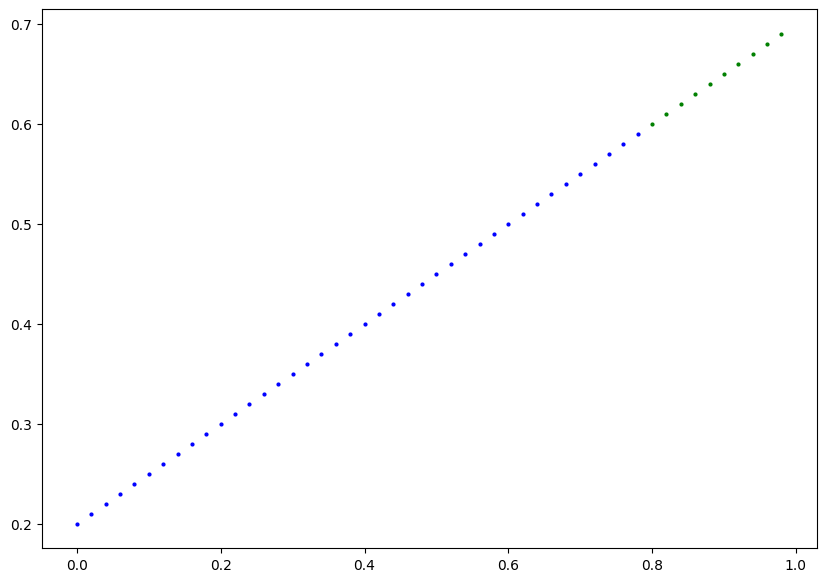

In [15]:
plot_pred();

### Building a pytorch model


Parameters are Tensor subclasses, that have a very special property when used with Module s - when they’re assigned as Module attributes they are automatically added to the list of its parameters, and will appear e.g. in parameters() iterator. Assigning a Tensor doesn’t have such effect. This is because one might want to cache some temporary state, like last hidden state of the RNN, in the model. If there was no such class as Parameter, these temporaries would get registered too.


In [16]:
#nn.module is the base class for all neural networks modujles
#Modules can also contain other Modules, allowing them to be nested in a tree structure.
class LinearRegressionModel(nn.module):
    def __init__(self):
        super().__init()
        self.weights = nn.parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    #Forward pass
    def forward(self, x:torch.Tensor):
        return self.weights *X + self.bias

SyntaxError: incomplete input (3188045087.py, line 3)